# Analysis for salmon trap data in the Dungenesss River from 2009
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2009, the counts for wild and hatchery fish are separate.


In [2]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io
import datetime
import matplotlib.dates as mdates

In [21]:
year = "2009"
# #read file in Windows
try:
    df_year = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
   sheet_name =year,
    header = [1,2,3,4]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_year.head()
columns = list(df_year)
print(columns)
df_year = df_year.iloc[:-1] #remove last line which has no data

#flatten dataframe and choose column names
list_names = []
for col in df_year.columns.values:
    
    check = str(col[0])
    if check == 'Trapping Intervals':
        list_names.append(str(col[2]))
    elif (str(col[2])[0:7] == 'Unnamed'):
        list_names.append(str(col[0]) + '_' + str(col[1]))
    else:
        list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))

# print(list_names)
df_year.columns = list_names

#making new columns
df_year["Down"] = pd.to_datetime(df_year["Down"])
df_year["Up"] = pd.to_datetime(df_year["Up"])
df_year['Date'] = df_year['Down'].dt.date
df_year['midpoint'] = df_year['Down'] + (df_year['Up'] - df_year['Down'])/2

#get rid of columns with Out !=0 and fill 0 instead of NANs
df_year= df_year[df_year['Out'] == 0]
df_year.fillna(0, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

[('Trapping Intervals', 'Trapping dates and times ', 'Down', 'Down'), ('Trapping Intervals', 'Trapping dates and times ', 'Up', 'Up'), ('Trapping Intervals', 'Hours Fished', 'In', 'TimeIn'), ('Trapping Intervals', 'Hours Fished', 'Out', 'TimeOut'), ('Chinook0', 'Total', 'Unnamed: 4_level_2', 10), ('Chinook0', 'Hatchery', 'CWT', '10\\30'), ('Chinook0', 'Hatchery', 'Unmarked', '10\\12'), ('Chinook0', 'Wild', 'Unnamed: 7_level_2', 'Unnamed: 7_level_3'), ('Chinook1', 'Total', 'Unnamed: 8_level_2', 11), ('Chinook1', 'Total', 'CWT', '11\\30'), ('Chinook1', 'Wild', 'Unnamed: 10_level_2', 'Unnamed: 10_level_3'), ('Coho1', 'Total', 'Unnamed: 11_level_2', 41), ('Coho1', 'Hatchery', 'Ad-mark', '41\\13'), ('Coho1', 'Hatchery', 'Ad-CWT', '41\\19'), ('Coho1', 'Wild', 'UC mark', '41\\08'), ('Coho1', 'Wild', 'Unmark', 'Unnamed: 15_level_3'), ('Chum', 'Wild', 'Unmarked', 20), ('Coho Fry', 'Wild', 'Unmarked', 40), ('Pink', 'Total', 'Unnamed: 18_level_2', 30), ('Steelhead Smolts', 'Total', 'Unnamed: 19_l

In [ ]:
#getting temperature data
#reading html data

url = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year + "_WTM_FM.TXT"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

url_flow = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year+ "_DSG_FM.TXT"
html_flow = urlopen(url_flow).read()
soup_flow = BeautifulSoup(html_flow, features="html.parser")

# kill all script and style elements
for script in soup_flow(["script", "style"]):
    script.extract()    # rip it out


text_flow = soup_flow.get_text()

text = text[522:-50]
text_flow = text_flow[519:-116]

df = pd.read_csv(io.StringIO(text), sep='\s+', header = None, names = ["date", "time", "temp", "quality"])
df_flow = pd.read_csv(io.StringIO(text_flow), sep='\s+', header = None, names = ["date", "time", "flow", "quality"])


In [55]:
df['midpoint'] =  pd.to_datetime(df['date'] + ' ' + df['time'])

df_year_temp = pd.merge_asof(df_year.dropna(subset = ['midpoint']),df, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

df_flow['midpoint'] =  pd.to_datetime(df_flow['date'] + ' ' + df_flow['time'])

df_year_temp_flow = pd.merge_asof(
    df_year_temp.dropna(subset = ['midpoint']),df_flow, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Down,Up,In,Out,Chinook0_Total,Chinook0_Hatchery_CWT,Chinook0_Hatchery_Unmarked,Chinook0_Wild,Chinook1_Total,Chinook1_Total_CWT,Chinook1_Wild,Coho1_Total,Coho1_Hatchery_Ad-mark,Coho1_Hatchery_Ad-CWT,Coho1_Wild_UC mark,Coho1_Wild_Unmark,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Total,Steelhead Smolts_Total,Steelhead Smolts_Hatchery_Ad-mark,Steelhead Smolts_Wild_UC mark,Steelhead Smolts_Wild_Unmark,Cutthroat_Wild_Smolt,Cutthroat_Wild_Adult,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Dolly\Bull_Wild_Smolt,Date,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2009-02-19 13:30:00,2009-02-19 16:20:00,2.833333,0.0,1.0,0.0,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2009-02-19,2009-02-19 14:55:00,02/19/2009,14:45,4.1,140,02/19/2009,14:45,108.0,8
1,2009-02-19 16:20:00,2009-02-20 09:00:00,16.666667,0.0,4.0,0.0,0.0,4,0.0,0.0,0,4.0,0.0,0.0,0.0,4,14.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,2009-02-19,2009-02-20 00:40:00,02/20/2009,00:30,3.1,140,02/20/2009,00:30,109.0,8
2,2009-02-20 09:00:00,2009-02-20 17:30:00,8.500000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2009-02-20,2009-02-20 13:15:00,02/20/2009,13:15,3.8,140,02/20/2009,13:15,106.0,8
3,2009-02-20 17:30:00,2009-02-21 07:45:00,14.250000,0.0,2.0,0.0,0.0,2,0.0,0.0,0,1.0,0.0,0.0,0.0,1,16.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2009-02-20,2009-02-21 00:37:30,02/21/2009,00:30,3.0,140,02/21/2009,00:30,103.0,8
4,2009-02-21 07:45:00,2009-02-21 17:30:00,9.750000,0.0,1.0,0.0,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2009-02-21,2009-02-21 12:37:30,02/21/2009,12:30,3.3,140,02/21/2009,12:30,107.0,8
5,2009-02-21 17:30:00,2009-02-22 07:20:00,13.833333,0.0,2.0,0.0,0.0,2,1.0,0.0,1,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2009-02-21,2009-02-22 00:25:00,02/22/2009,00:15,3.6,140,02/22/2009,00:15,104.0,8
6,2009-02-22 07:20:00,2009-02-22 17:30:00,10.166667,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2009-02-22,2009-02-22 12:25:00,02/22/2009,12:15,4.5,140,02/22/2009,12:15,110.0,8
7,2009-02-22 17:30:00,2009-02-23 07:00:00,13.500000,0.0,1.0,0.0,0.0,1,0.0,0.0,0,2.0,0.0,0.0,0.0,2,28.0,0.0,3.0,0.0,0.0,0.0,0,0.0,0.0,2.0,2.0,0.0,2009-02-22,2009-02-23 00:15:00,02/23/2009,00:15,4.6,140,02/23/2009,00:15,120.0,8
8,2009-02-23 07:00:00,2009-02-23 17:35:00,10.583333,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,2009-02-23,2009-02-23 12:17:30,02/23/2009,12:15,4.4,140,02/23/2009,12:15,133.0,8
9,2009-02-23 17:35:00,2009-02-24 07:30:00,13.916667,0.0,1.0,0.0,0.0,1,0.0,0.0,0,1.0,0.0,0.0,0.0,1,19.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2009-02-23,2009-02-24 00:32:30,02/24/2009,00:30,4.5,140,02/24/2009,00:30,124.0,8


In [56]:
df_year_temp_flow = df_year_temp_flow.rename(columns={'Chinook0_Hatchery_CWT':'Chinook0_Hat',
                                       'Chinook0_Hatchery_Unmarked':'Chinook0_Hat1',
                                       "Chinook1_Total_CWT":'Chinook1_Hat',                        
                                       'Coho1_Hatchery_Ad-mark':'Coho1_Hat',
                                       'Coho1_Hatchery_Ad-CWT':'Coho1_Hat1', 
                                       'Coho1_Wild_UC mark':'Coho1_Wild',
                                       'Coho1_Wild_Unmark':'Coho1_Wild1', 
                                       'Steelhead Smolts_Total':'Steelhead1_Total',
                                       'Steelhead Smolts_Wild_UC mark':'Steelhead1_Wild',
                                       'Steelhead Smolts_Wild_Unmark':'Steelhead1_Wild1',
                                       'Steelhead Smolts_Hatchery_Ad-mark':'Steelhead1_Hat'})
#aggregating data
groupedby_dates_year = df_year_temp_flow.groupby(by=["Date"]).agg({'In':'sum',
                                       'Out':'sum',
                                       'Chinook0_Total':'sum',
                                       'Chinook0_Hat':'sum',
                                       'Chinook0_Hat1':'sum',
                                       'Chinook0_Wild':'sum',                            
                                       'Chinook1_Total':'sum',
                                       'Chinook1_Hat':'sum',
                                       'Chinook1_Wild':'sum',  
                                       'Coho1_Total':'sum',
                                       'Coho1_Wild':'sum',
                                       'Coho1_Wild1':'sum',
                                       'Coho1_Hat':'sum',
                                       'Coho1_Hat1':'sum', 
                                       'Steelhead1_Total':'sum',
                                       'Steelhead1_Wild':'sum',
                                       'Steelhead1_Wild1':'sum',
                                       'Steelhead1_Hat':'sum', 
                                       'Trout Parr_Wild_Steelhead':'sum',
                                       'temp':'mean',
                                       'flow':'mean'})
# groupedby_dates_year = groupedby_dates_year[groupedby_dates_year['Out'] == 0]
# groupedby_dates_year.fillna(0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)
    

,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Wild,Coho1_Total,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Coho1_Hat1,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Hat,Trout Parr_Wild_Steelhead,temp,flow
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-19,19.500000,0.0,5.0,0.0,0.0,5,0.0,0.0,0,4.0,0.0,4,0.0,0.0,0.0,0.0,0,0.0,1.0,3.600000,108.500000
2009-02-20,22.750000,0.0,2.0,0.0,0.0,2,0.0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,3.400000,104.500000
2009-02-21,23.583333,0.0,3.0,0.0,0.0,3,1.0,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.450000,105.500000
2009-02-22,23.666667,0.0,1.0,0.0,0.0,1,0.0,0.0,0,2.0,0.0,2,0.0,0.0,0.0,0.0,0,0.0,2.0,4.550000,115.000000
2009-02-23,24.500000,0.0,1.0,0.0,0.0,1,0.0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,0,0.0,1.0,4.450000,128.500000
2009-02-24,23.500000,0.0,3.0,0.0,0.0,3,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,4.850000,131.500000
2009-02-25,24.000000,0.0,1.0,0.0,0.0,1,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.450000,138.500000
2009-02-26,24.250000,0.0,3.0,0.0,0.0,3,0.0,0.0,0,4.0,0.0,4,0.0,0.0,0.0,0.0,0,0.0,0.0,2.750000,130.500000
2009-02-27,23.750000,0.0,2.0,0.0,0.0,2,0.0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,3.250000,120.000000


In [58]:
#calculate fish per hour
#chinook 0
groupedby_dates_year['chinook0_perhour'] = groupedby_dates_year['Chinook0_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook0_hatchery_perhour'] = (
    groupedby_dates_year['Chinook0_Hat']+groupedby_dates_year['Chinook0_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['chinook0_wild_perhour'] = groupedby_dates_year['Chinook0_Wild']/groupedby_dates_year['In']

#chinook 1
groupedby_dates_year['chinook1_perhour'] = groupedby_dates_year['Chinook1_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook1_hatchery_perhour'] = (groupedby_dates_year['Chinook1_Hat'])/groupedby_dates_year['In']
groupedby_dates_year['chinook1_wild_perhour'] = groupedby_dates_year['Chinook1_Wild']/groupedby_dates_year['In']

#coho 1
groupedby_dates_year['coho1_perhour'] = groupedby_dates_year['Coho1_Total']/groupedby_dates_year['In']
groupedby_dates_year['coho1_hatchery_perhour'] = (
    groupedby_dates_year['Coho1_Hat'] + groupedby_dates_year['Coho1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['coho1_wild_perhour'] = (groupedby_dates_year['Coho1_Wild']+groupedby_dates_year['Coho1_Wild1'])/groupedby_dates_year['In']

#steelhead
groupedby_dates_year['steelheadsmolt_perhour'] = groupedby_dates_year['Steelhead1_Total']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_hatchery_perhour'] = groupedby_dates_year['Steelhead1_Hat']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_wild_perhour'] = (
    groupedby_dates_year['Steelhead1_Wild']+groupedby_dates_year['Steelhead1_Wild1'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_parr_perhour'] = groupedby_dates_year['Trout Parr_Wild_Steelhead']/groupedby_dates_year['In']



In [59]:
#function to plot fish per hour

def plot_fish_perhour(groupedby_dates_year, species = "chinook", year = "0", types=["hatchery", "wild", "total"]):
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    for fish_type in types:

        if fish_type == "total":
            x_string = species + year + "_" + "perhour"
            fish_color = "gray"
        if fish_type == "wild":  
            x_string = species + year +"_" + "wild" + "_" + "perhour"
            fish_color = "salmon"
        if fish_type == "hatchery":  
            x_string = species + year +"_" + "hatchery" + "_" + "perhour"
            fish_color = "seagreen"
        if fish_type == "parr":  
            x_string = species + year +"_" + "parr" + "_" + "perhour"
            fish_color = "orangered"


        
        ax1.plot(
            groupedby_dates_year.index, groupedby_dates_year[x_string], color = fish_color,
            label = fish_type, alpha = 0.5, linewidth = lw)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date', size = 0.9*fs)
    plt.ylabel(species + " " +year + "+" + ' counts per hour', size = 0.9*fs)
    ax1.tick_params(labelsize=.8*fs)
    ax1.set_title(species + " " +year + "+" + ' counts', loc='left', fontsize = fs*1.5)
    plt.legend(fontsize=fs, loc='upper right', title = '')

    plt.show()

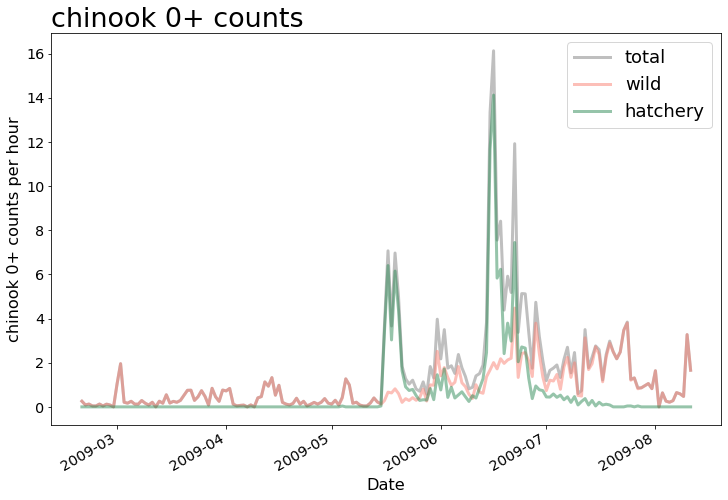

In [60]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","0",["total","wild","hatchery"])

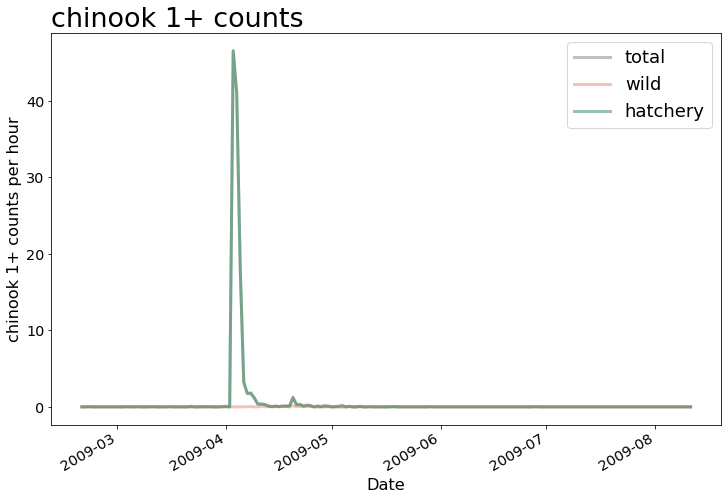

In [61]:
#chinook1
plot_fish_perhour(groupedby_dates_year,"chinook","1",["total","wild","hatchery"])

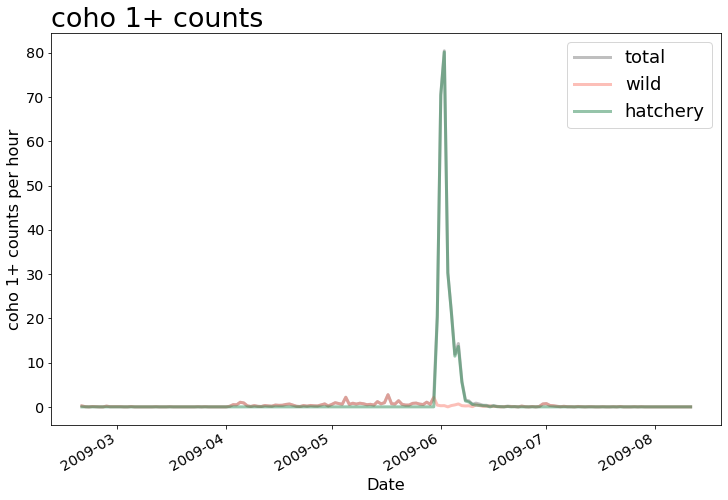

In [63]:
#coho1
plot_fish_perhour(groupedby_dates_year,"coho","1",["total","wild","hatchery"])

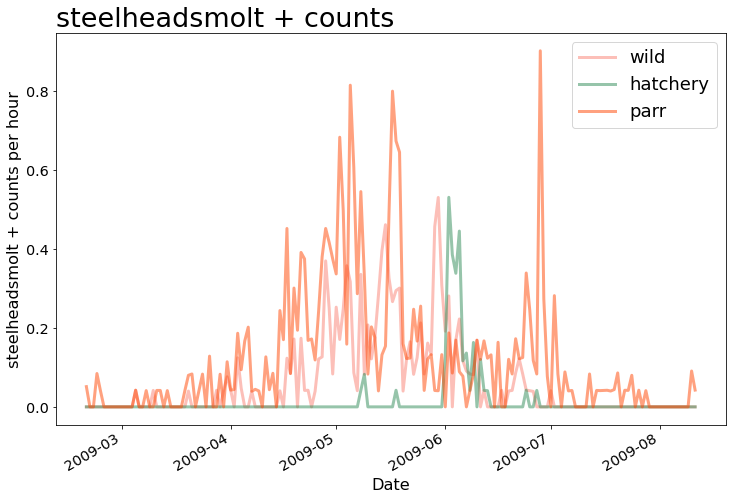

In [65]:
#steelhead
plot_fish_perhour(groupedby_dates_year,"steelheadsmolt","",["wild","hatchery","parr"])

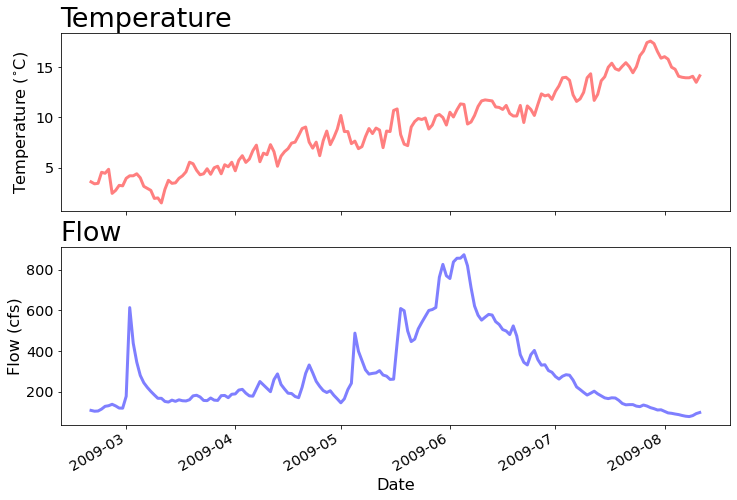

In [66]:
#plot temperature and flow
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1.plot(
    groupedby_dates_year.index, groupedby_dates_year['temp'], color = 'red', 
    label = 'temperature', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Temperature '+ r'($^{\circ}$C)', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Temperature', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')


#flow
ax2 = fig.add_subplot(212)
ax2.plot(
    groupedby_dates_year.index, groupedby_dates_year['flow'], color = 'blue', 
    label = 'flow', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Flow (cfs)', size = 0.9*fs)
ax2.tick_params(labelsize=.8*fs)
ax2.set_title('Flow', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [67]:
groupedby_dates_year.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2009_dungeness.csv")  
df_year_temp_flow.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2009_dungeness_all.csv")

In [68]:
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(df_midpoint.index.floor('60T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                    'Chinook0_Hat1',
                    'Chinook0_Wild',
                    'Chinook1_Hat',
                    'Chinook1_Wild',
                    'Coho1_Wild',
                    'Coho1_Wild1',
                    'Coho1_Hat',
                    'Coho1_Hat1',    
                    'Steelhead1_Hat',
                    'Steelhead1_Wild',
                    'Steelhead1_Wild1',
                    'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat']/groupedby_time_year_subset['Steelhead1_Hat'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Coho1_Hat1,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Trout Parr_Wild_Steelhead,Chinook0_Hat_all,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Wild_all,Coho1_Wild_prop,Coho1_Hat_all,Coho1_Hat_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.752459,0.002659,0.611539,0.319064,0.013294,0.015953,0.172826,0.401489,0.023930,0.005318,0.000000,0.007977,0.037224,0.755118,0.022834,0.020827,0.319064,0.003918,0.119778,0.188780,0.020321,0.425419,0.000198,0.007977,0.001281,0.000907,0.018261
01:00:00,1.271016,0.013802,1.362610,0.439147,0.032622,0.052698,0.331242,1.031368,0.057716,0.026349,0.008783,0.120452,0.205772,1.284818,0.038852,0.046406,0.439147,0.005393,0.293917,0.383940,0.041329,1.089084,0.000507,0.129235,0.020759,0.004493,0.100944
02:00:00,1.252472,0.019776,2.129202,0.058009,0.030323,0.146341,0.547132,0.454845,0.027686,0.007910,0.006592,0.134476,0.345419,1.272248,0.038472,0.072514,0.058009,0.000712,0.273200,0.693474,0.074648,0.482531,0.000225,0.141068,0.022660,0.001349,0.169450
03:00:00,1.513962,0.033644,2.072446,1.998430,0.033644,0.127846,0.484468,3.068297,0.322979,0.080745,0.006729,0.127846,0.201862,1.547606,0.046799,0.070581,1.998430,0.024542,0.303118,0.612314,0.065911,3.391275,0.001578,0.134574,0.021617,0.013767,0.099026
04:00:00,2.070081,0.000000,2.814016,0.000000,0.000000,0.000000,0.097035,57.574124,4.916442,0.646900,0.000000,0.194070,0.323450,2.070081,0.062598,0.095836,0.000000,0.000000,0.000000,0.097035,0.010445,62.490566,0.029076,0.194070,0.031174,0.110298,0.158673
05:00:00,2.114216,0.000000,1.603888,52.563791,0.000000,0.000000,0.874848,46.585662,3.426488,0.291616,0.000000,0.218712,0.145808,2.114216,0.063933,0.054623,52.563791,0.645510,0.000000,0.874848,0.094172,50.012151,0.023270,0.218712,0.035132,0.049721,0.071528
08:00:00,0.000000,0.000000,0.691525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10:00:00,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11:00:00,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.004320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12:00:00,0.000000,0.000000,0.062808,0.022167,0.000000,0.000000,0.000000,0.007389,0.000000,0.000000,0.000000,0.003695,0.007389,0.000000,0.000000,0.002139,0.022167,0.000272,0.000000,0.000000,0.000000,0.007389,0.000003,0.003695,0.000593,0.000000,0.003625


In [69]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2009_dungeness_time.csv")  


Text(0.0, 1.0, 'Proportion of Chinook 0+')

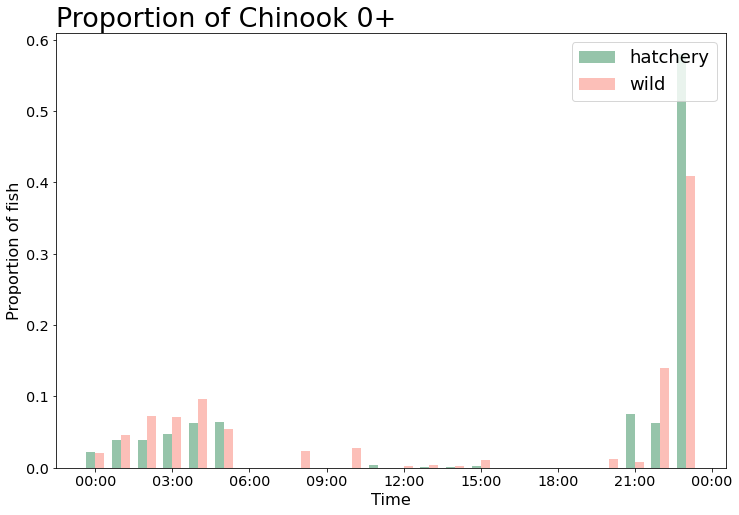

In [70]:

my_day = datetime.date(2014, 7, 15)
x_dt = [ datetime.datetime.combine(my_day, t) for t in groupedby_time_year_subset.index ]
width_bar=(x_dt[1]-x_dt[0])*0.35
x_dt1 = [(t - (width_bar/2)) for t in x_dt]
x_dt2 = [(t + (width_bar/2)) for t in x_dt]

#bar plot Chinook0

fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
plt.bar(
    x_dt1, groupedby_time_year_subset['Chinook0_Hat_prop'], color = 'seagreen', 
    label = 'hatchery', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt2, groupedby_time_year_subset['Chinook0_Wild_prop'], color = 'salmon', 
    label = 'wild', alpha = 0.5, width=width_bar)
# plt.gcf().autofmt_xdate()
plt.xlabel('Time', size = 0.9*fs)
plt.ylabel('Proportion of fish', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)

plt.legend(fontsize=fs, loc='upper right', title = '')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax1.set_title('Proportion of Chinook 0+', loc='left', fontsize = fs*1.5)

Text(0.0, 1.0, 'Proportion of Chinook 1+')

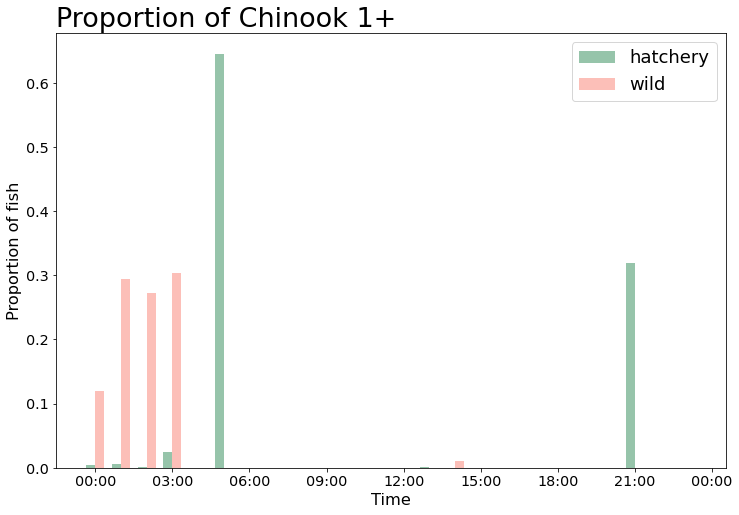

In [71]:
#bar plot Chinook1

fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
plt.bar(
    x_dt1, groupedby_time_year_subset['Chinook1_Hat_prop'], color = 'seagreen', 
    label = 'hatchery', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt2, groupedby_time_year_subset['Chinook1_Wild_prop'], color = 'salmon', 
    label = 'wild', alpha = 0.5, width=width_bar)
# plt.gcf().autofmt_xdate()
plt.xlabel('Time', size = 0.9*fs)
plt.ylabel('Proportion of fish', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)

plt.legend(fontsize=fs, loc='upper right', title = '')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax1.set_title('Proportion of Chinook 1+', loc='left', fontsize = fs*1.5)

Text(0.0, 1.0, 'Proportion of Coho 1+')

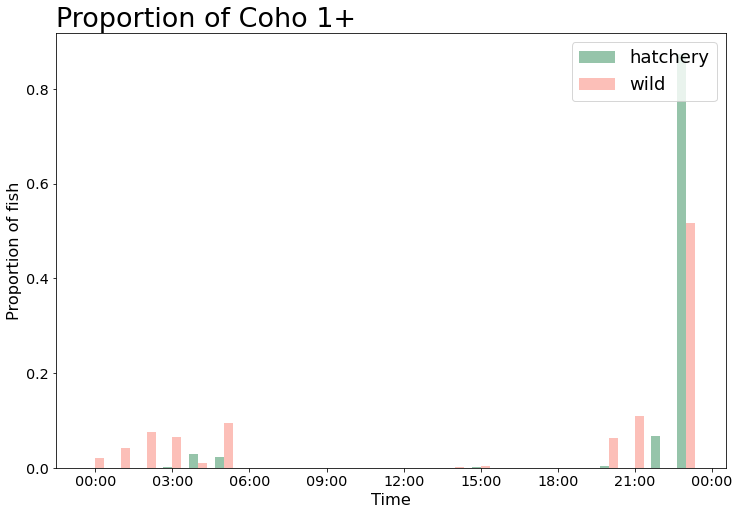

In [72]:
#bar plot Coho1

fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
plt.bar(
    x_dt1, groupedby_time_year_subset['Coho1_Hat_prop'], color = 'seagreen', 
    label = 'hatchery', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt2, groupedby_time_year_subset['Coho1_Wild_prop'], color = 'salmon', 
    label = 'wild', alpha = 0.5, width=width_bar)
# plt.gcf().autofmt_xdate()
plt.xlabel('Time', size = 0.9*fs)
plt.ylabel('Proportion of fish', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)

plt.legend(fontsize=fs, loc='upper right', title = '')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax1.set_title('Proportion of Coho 1+', loc='left', fontsize = fs*1.5)

Text(0.0, 1.0, 'Proportion of Steelhead')

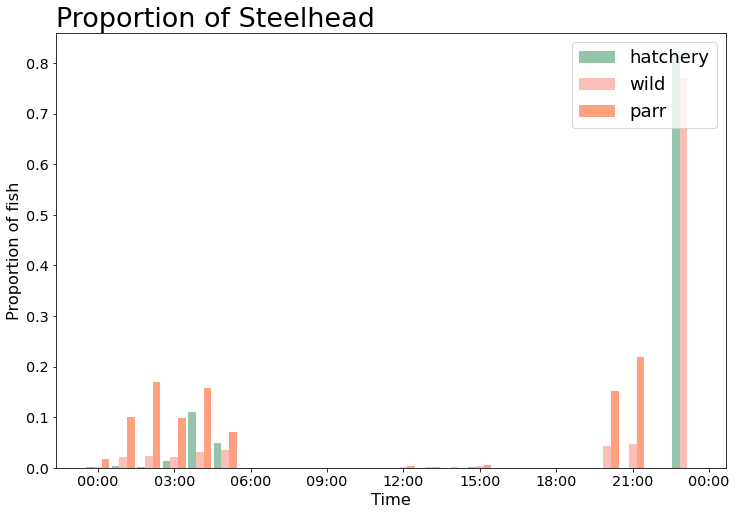

In [74]:
#bar plot Steelhead

width_bar=(x_dt[1]-x_dt[0])*0.3
x_dt1 = [(t - (width_bar)) for t in x_dt]
x_dt2 = [(t) for t in x_dt]
x_dt3 = [(t + (width_bar)) for t in x_dt]

fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
plt.bar(
    x_dt1, groupedby_time_year_subset['Steelhead1_Hat_prop'], color = 'seagreen', 
    label = 'hatchery', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt2, groupedby_time_year_subset['Steelhead1_Wild_prop'], color = 'salmon', 
    label = 'wild', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt3, groupedby_time_year_subset['Steelhead1_Parr_prop'], color = 'orangered', 
    label = 'parr', alpha = 0.5, width=width_bar)
# plt.gcf().autofmt_xdate()
plt.xlabel('Time', size = 0.9*fs)
plt.ylabel('Proportion of fish', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)

plt.legend(fontsize=fs, loc='upper right', title = '')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax1.set_title('Proportion of Steelhead', loc='left', fontsize = fs*1.5)

In [1]:
import pandas as pd
year = "2009"
csv_name ="C:/Users/maria/OneDrive/Documents/data/pied_piper/"+str(year)+"_dungeness_all.csv"
df_year_temp_flow = pd.read_csv(csv_name, header=0) 
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(pd.to_datetime(df_midpoint.index).floor('480T').time).sum()
# print(df_midpoint)
groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                    'Chinook0_Hat1',
                    'Chinook0_Wild',
                    'Chinook1_Hat',
                    'Chinook1_Wild',
                    'Coho1_Wild',
                    'Coho1_Wild1',
                    'Coho1_Hat',
                    'Coho1_Hat1',    
                    'Steelhead1_Hat',
                    'Steelhead1_Wild',
                    'Steelhead1_Wild1',
                    'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat']/groupedby_time_year_subset['Steelhead1_Hat'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Coho1_Hat1,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Trout Parr_Wild_Steelhead,Chinook0_Hat_all,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Wild_all,Coho1_Wild_prop,Coho1_Hat_all,Coho1_Hat_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,1.206673,0.015060,1.575641,0.720992,0.027767,0.083771,0.391086,1.973316,0.152011,0.030590,0.006118,0.107772,0.226840,1.221733,0.435680,0.713279,0.720992,0.049031,0.982037,0.474857,0.364459,2.125326,0.091483,0.113890,0.268374,0.484083,0.378716
08:00:00,0.023871,0.002032,0.119863,0.022855,0.000508,0.005587,0.004063,0.166589,0.014729,0.000508,0.002539,0.003047,0.003047,0.025903,0.009237,0.054261,0.022855,0.001554,0.017963,0.009650,0.007406,0.181318,0.007805,0.005587,0.013165,0.008037,0.005088
16:00:00,1.556566,0.000000,0.513506,13.960952,0.000000,0.096282,0.722118,19.994651,0.930730,0.032094,0.016047,0.288847,0.369083,1.556566,0.555083,0.232460,13.960952,0.949415,0.000000,0.818401,0.628134,20.925381,0.900713,0.304894,0.718461,0.507880,0.616196


In [2]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2009_dungeness_time_daylight.csv")  
